<a href="https://colab.research.google.com/github/Abhiroop17/Customer-Churn-Prediction/blob/main/Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Customer Churn Prediction**

This flow includes data preprocessing, feature scaling, hyperparameter tuning with both RandomizedSearchCV and GridSearchCV, and finally model evaluation and feature importance visualization. This setup provides a robust model that is optimized for predicting customer churn.

# **Importing necessary Libraries**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Load dataset
data = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# **Data Preprocessing**

In [ ]:
# Drop irrelevant columns (e.g., customerID)
data.drop(['customerID'], axis=1, inplace=True)

In [ ]:
# Convert TotalCharges to numeric, handling any errors
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['TotalCharges'].fillna(data['TotalCharges'].mean(), inplace=True)

<ipython-input-4-47625ca01f92>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['TotalCharges'].fillna(data['TotalCharges'].mean(), inplace=True)


# **Encode categorical features**

In [ ]:
for column in data.select_dtypes(include=['object']).columns:
    if column != 'Churn':
        data[column] = LabelEncoder().fit_transform(data[column])

# Encode target variable
data['Churn'] = data['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

In [ ]:
# Separate features and target
X = data.drop('Churn', axis=1)
y = data['Churn']

# **Split Data into Training and Testing Sets**

In [ ]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Scale the Data**

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **Define Parameter Grid for Hyperparameter Tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# **Implement RandomizedSearchCV**

In [ ]:
# Initialize RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,  # Number of random combinations to try
    cv=3,  # 3-fold cross-validation
    scoring='accuracy',  # Evaluation metric
    verbose=2,
    random_state=42,
    n_jobs=-1  # Use all processors
)

# Fit to training data
random_search.fit(X_train, y_train)

# Print best parameters and score
print("Best Parameters from RandomizedSearchCV:", random_search.best_params_)
print("Best Score from RandomizedSearchCV:", random_search.best_score_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
24 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_

Best Parameters from RandomizedSearchCV: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 30}
Best Score from RandomizedSearchCV: 0.8008519701810437


# **Refine with GridSearchCV**

In [ ]:
# Define a refined parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [random_search.best_params_['n_estimators'] - 50, random_search.best_params_['n_estimators'], random_search.best_params_['n_estimators'] + 50],
    'max_depth': [random_search.best_params_['max_depth'] - 10, random_search.best_params_['max_depth'], random_search.best_params_['max_depth'] + 10],
    'min_samples_split': [random_search.best_params_['min_samples_split'] - 1, random_search.best_params_['min_samples_split']],
    'min_samples_leaf': [random_search.best_params_['min_samples_leaf'] - 1, random_search.best_params_['min_samples_leaf']]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    verbose=2,
    n_jobs=-1
)

# Fit to training data
grid_search.fit(X_train, y_train)

# Print best parameters and score
print("Best Parameters from GridSearchCV:", grid_search.best_params_)
print("Best Score from GridSearchCV:", grid_search.best_score_)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters from GridSearchCV: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 150}
Best Score from GridSearchCV: 0.8012069577564785


# **Display first 10 Predictions and Probabilities**

In [ ]:
# Use the best model from GridSearchCV
best_rf = grid_search.best_estimator_

# Predict and evaluate
y_pred = best_rf.predict(X_test)
print("Predictions:", y_pred[:10])  # Shows first 10 predictions

Predictions: [1 0 0 1 0 0 0 0 0 0]


In [ ]:
# Get probability scores for each class
y_prob = best_rf.predict_proba(X_test)

# Display probabilities for the first few predictions
print("Probability scores:\n", y_prob[:10])


Probability scores:
 [[0.32545674 0.67454326]
 [0.88916629 0.11083371]
 [0.98492724 0.01507276]
 [0.18897599 0.81102401]
 [0.96335934 0.03664066]
 [0.83380349 0.16619651]
 [0.92949726 0.07050274]
 [0.98617998 0.01382002]
 [0.84106989 0.15893011]
 [0.68016625 0.31983375]]


# **Evaluate the Final Model**

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8105039034776437

Confusion Matrix:
 [[952  84]
 [183 190]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.92      0.88      1036
           1       0.69      0.51      0.59       373

    accuracy                           0.81      1409
   macro avg       0.77      0.71      0.73      1409
weighted avg       0.80      0.81      0.80      1409



# **Feature Importance Visualization**

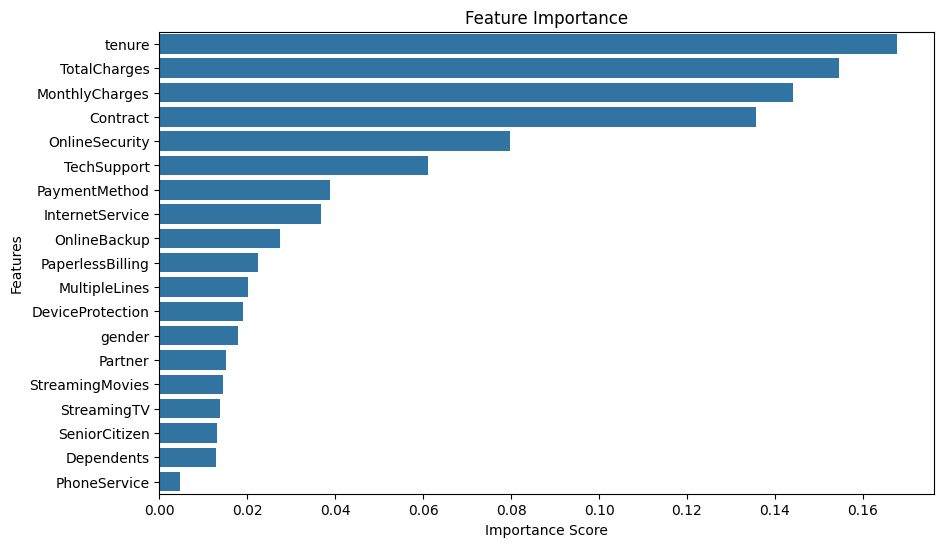

In [ ]:
# Feature importance
feature_importances = pd.Series(best_rf.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()